In [7]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [3]:
# define state for graph
class BMIData(TypedDict):
    weight_kg: float
    hieght_mtr: float
    bmi: float

In [6]:

def calculate_bmi_value(state: BMIData)-> BMIData:
    wt=state['weight_kg']
    ht=state['hieght_mtr']

    bmi_value=wt/(ht**2)

    state['bmi']=bmi_value
    return state


In [8]:
bmigraph=StateGraph(BMIData)

# add nodes - it need name and function
bmigraph.add_node('calculate_bmi',calculate_bmi_value)

# add edge
bmigraph.add_edge(START,'calculate_bmi')
bmigraph.add_edge('calculate_bmi',END)

# compile
bmi_workflow=bmigraph.compile()

In [11]:
output_state=bmi_workflow.invoke({'weight_kg':66,'hieght_mtr':1.63})
output_state

{'weight_kg': 66, 'hieght_mtr': 1.63, 'bmi': 24.840980089578082}

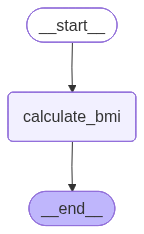

In [12]:

from IPython.display import Image
Image(bmi_workflow.get_graph().draw_mermaid_png())

### adding some more complexity

In [13]:
# define state for graph
class HealthData(TypedDict):
    weight_kg: float
    hieght_mtr: float
    bmi: float
    category: str

In [14]:
def find_fitness(state:HealthData):
    bmi = state['bmi']

    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"
    return state


In [17]:
bmigraph=StateGraph(HealthData)

# add nodes - it need name and function
bmigraph.add_node('calculate_bmi',calculate_bmi_value)
bmigraph.add_node('find_fitness_group',find_fitness)



# add edge
bmigraph.add_edge(START,'calculate_bmi')
bmigraph.add_edge('calculate_bmi','find_fitness_group')
bmigraph.add_edge('find_fitness_group',END)

# compile
bmi_workflow=bmigraph.compile()

In [18]:
output_state=bmi_workflow.invoke({'weight_kg':66,'hieght_mtr':1.63})
output_state

{'weight_kg': 66,
 'hieght_mtr': 1.63,
 'bmi': 24.840980089578082,
 'category': 'Normal'}

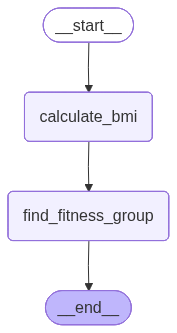

In [19]:

from IPython.display import Image
Image(bmi_workflow.get_graph().draw_mermaid_png())